# take2

**GOAL**: Keep It Stupid Simple = KISS.

**References**:
 1. [ilqgames/python](https://github.com/HJReachability/ilqgames/blob/master/python)

In [1]:
%load_ext autoreload
%autoreload 1
%aimport decentralized.control2

In [4]:
import functools

import numpy as np
import matplotlib.pyplot as plt
import torch

from decentralized import control2
import pocketknives

In [32]:
%matplotlib widget
plt.rcParams['axes.grid'] = True

<Figure size 640x480 with 0 Axes>

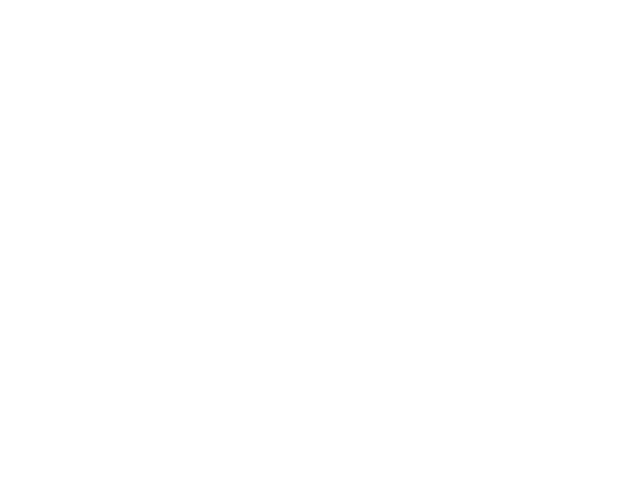

In [62]:
plt.figure()

In [95]:
def plot_solve(X, U, J):
    """Plot the resultant trajectory on plt.gcf()"""
    N = X.shape[0]
    t = np.arange(N) * dt

    plt.clf()
    plt.scatter(X[:,0], X[:,1], c=t)
    plt.scatter(X[0,0], X[0,1], 80, 'g', 'x', label="$x_0$")
    plt.scatter(x_goal[0], x_goal[1], 80, 'r', 'x', label="$x_f$")
    plt.margins(0.1)
    
    plt.title(f"Final Cost: {J:.3g}")

## dynamics

In [91]:
def unicycle_continuous(x, u):
    """
    Compute the time derivative of state for a particular state/control.
    NOTE: `x` and `u` should be 2D (i.e. column vectors).
    REF: [1]
    """
    assert isinstance(x, torch.Tensor) and isinstance(u, torch.Tensor)

    x_dot = torch.zeros(x.numel())
    x_dot[0] = x[3] * torch.cos(x[2])
    x_dot[1] = x[3] * torch.sin(x[2])
    x_dot[2] = u[0]
    x_dot[3] = u[1]
    return x_dot

## costs

In [115]:
def QR_goal_cost(x, u, _x_goal, _Q, _R, _Qf=None, terminal=False):
    """Cost of reaching the goal"""
    
    assert isinstance(x, torch.Tensor) and isinstance(u, torch.Tensor)
    x = x.reshape(-1,1)
    u = u.reshape(-1,1)
    
    if _Qf is None:
        _Qf = torch.eye(Q.shape[0])
    
    if terminal:
        return (x - _x_goal).T @ _Qf @ (x - _x_goal)
    return (x - _x_goal).T @ _Q @ (x - _x_goal) + u.T @ _R @ u

## single-agent problem

In [119]:
dt = 0.1
N = 50
tol = 1e-6

x = torch.tensor([-10, 10, 0, 0], dtype=torch.float, requires_grad=True)
x_goal = torch.zeros((4, 1), dtype=torch.float)

Q = torch.diag(torch.tensor([1., 1, 0, 0]))
Qf = 1000 * torch.eye(Q.shape[0])
R = torch.eye(2)
goal_cost = functools.partial(QR_goal_cost, _x_goal=x_goal, _Q=Q, _R=R, _Qf=Qf)

ilqr = control2.iLQR(unicycle_continuous, goal_cost, x.numel(), u.numel(), dt, N)
X, U, J = ilqr.solve(x, tol=tol)
plot_solve(X, U, J)

0/50	J: 209878
1/50	J: 140560	μ: 0.5	Δ: 0.5
2/50	J: 135350	μ: 0.125	Δ: 0.25
3/50	J: 57659.7	μ: 0.015625	Δ: 0.125
4/50	J: 5352.69	μ: 0.000976562	Δ: 0.0625
5/50	J: 3796.07	μ: 3.05176e-05	Δ: 0.03125
6/50	J: 3190.39	μ: 0	Δ: 0.015625
7/50	J: 3113.08	μ: 0	Δ: 0.0078125
8/50	J: 3089.72	μ: 0	Δ: 0.00390625
9/50	J: 3078.74	μ: 0	Δ: 0.00195312
10/50	J: 3074.1	μ: 0	Δ: 0.000976562
11/50	J: 3072.02	μ: 0	Δ: 0.000488281
12/50	J: 3071.14	μ: 0	Δ: 0.000244141
13/50	J: 3070.76	μ: 0	Δ: 0.00012207
14/50	J: 3070.6	μ: 0	Δ: 6.10352e-05
15/50	J: 3070.53	μ: 0	Δ: 3.05176e-05
16/50	J: 3070.5	μ: 0	Δ: 1.52588e-05
17/50	J: 3070.48	μ: 0	Δ: 7.62939e-06
18/50	J: 3070.48	μ: 0	Δ: 3.8147e-06


In [121]:
X

array([[-1.00000000e+01,  1.00000000e+01,  0.00000000e+00,
         0.00000000e+00],
       [-1.00000000e+01,  1.00000000e+01, -3.34941655e-01,
         1.29861367e+00],
       [-9.87735462e+00,  9.95731258e+00, -5.60895085e-01,
         2.42982340e+00],
       [-9.67160225e+00,  9.82805920e+00, -6.86507642e-01,
         3.39274359e+00],
       [-9.40918541e+00,  9.61301327e+00, -7.49328017e-01,
         4.19724655e+00],
       [-9.10188580e+00,  9.32711887e+00, -7.78895020e-01,
         4.85593557e+00],
       [-8.75629330e+00,  8.98599243e+00, -7.92286992e-01,
         5.38168144e+00],
       [-8.37838173e+00,  8.60283756e+00, -7.98173547e-01,
         5.78699398e+00],
       [-7.97444057e+00,  8.18844128e+00, -8.00721824e-01,
         6.08385515e+00],
       [-7.55088949e+00,  7.75170660e+00, -8.01923394e-01,
         6.28366613e+00],
       [-7.11396980e+00,  7.30010271e+00, -8.02762449e-01,
         6.39722872e+00],
       [-6.66953993e+00,  6.83996391e+00, -8.03761601e-01,
      